regression lineaire

   surface  nb_pieces  age  quartier    prix
0      142          5   32         3  472290
1      132          6    0         2  495843
2       54          6   18         3  253992
3      146          3   30         3  477561
4      111          2   15         1  360855
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   surface    1000 non-null   int64
 1   nb_pieces  1000 non-null   int64
 2   age        1000 non-null   int64
 3   quartier   1000 non-null   int64
 4   prix       1000 non-null   int64
dtypes: int64(5)
memory usage: 39.2 KB


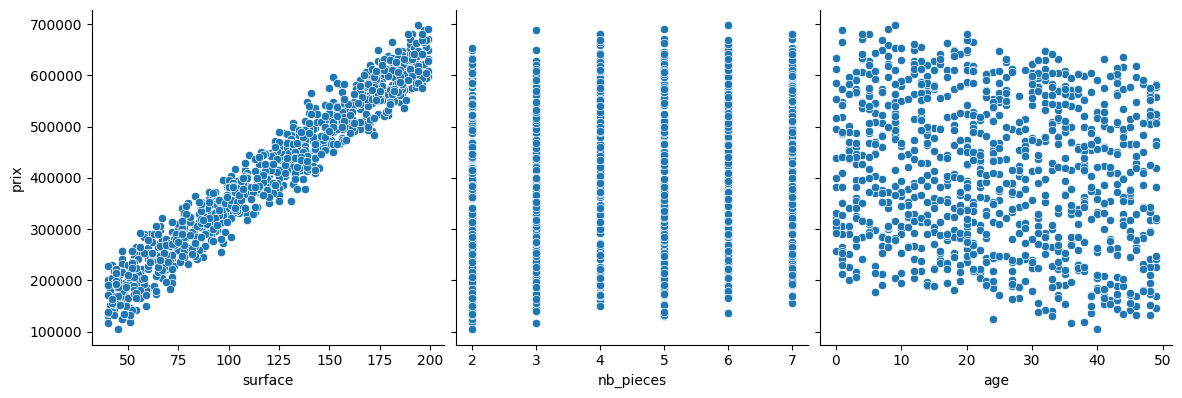

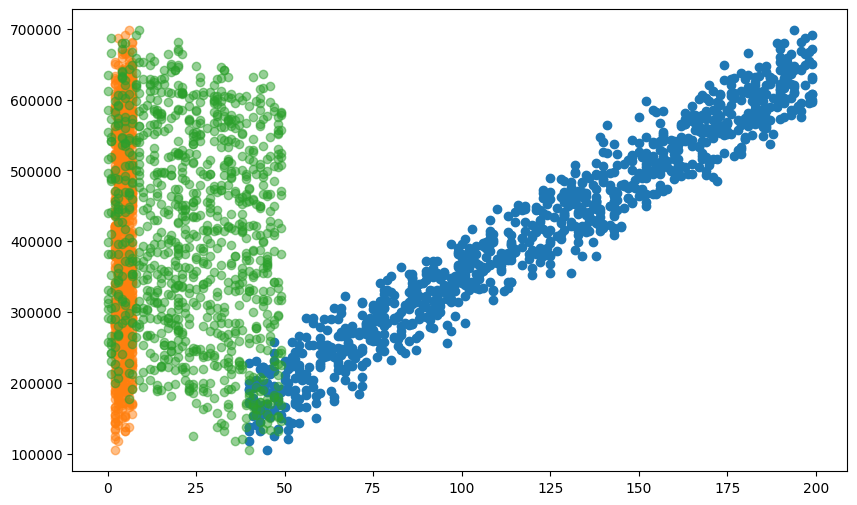

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Charger le fichier CSV
df = pd.read_csv("maisons.csv")
print(df.head())

df.info()
# Séparer les caractéristiques et la cible
X = df[['surface', 'nb_pieces', 'age', 'quartier']]
y = df['prix']

#nuage des points
# Convertir les variables catégorielles en variables numériques
X = pd.get_dummies(X, columns=['quartier'], drop_first=True)
#tracer les nuages de points pour tous les attributs
import seaborn as sns
sns.pairplot(df, x_vars=['surface', 'nb_pieces', 'age'], y_vars='prix', height=4, aspect=1, kind='scatter')
#rassembler tous en un seul graphique
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))     
plt.scatter(df['surface'], df['prix'], label='Surface')
plt.scatter(df['nb_pieces'], df['prix'], label='Nombre de pièces', alpha=0.5)   
plt.scatter(df['age'], df['prix'], label='Âge', alpha=0.5)

In [3]:
# Diviser le dataset en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#affichage de dimenssions
print(f"Dimensions d'entraînement: {X_train.shape}, Dimensions de test: {X_test.shape}")
# Entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)


Dimensions d'entraînement: (700, 5), Dimensions de test: (300, 5)


LinearRegression()

MAE: 8091.25
MAPE: 2.23%
ERMSE: 10032.44
MSE: 100649760.57
R²: 1.00


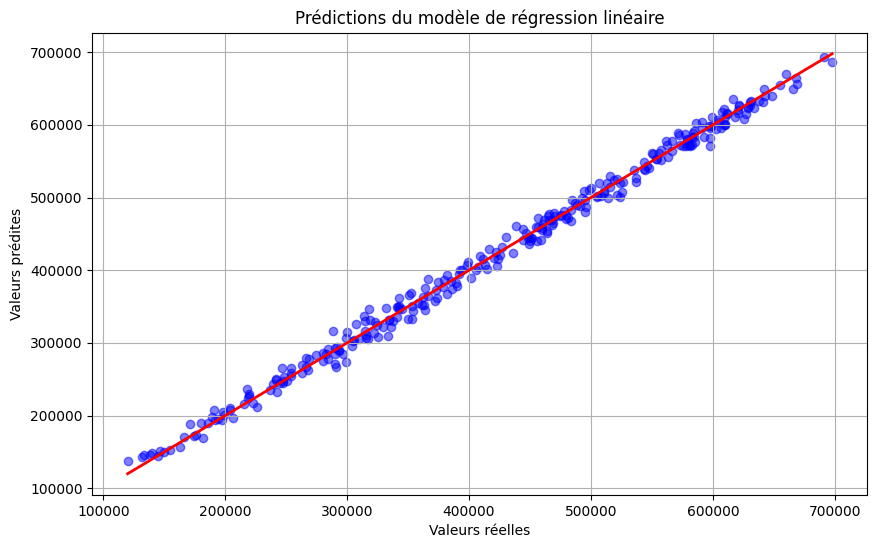

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

# Supposons que X_test, y_test, et model sont déjà définis
# Prédictions du modèle
y_pred = model.predict(X_test)

# Calculer les métriques
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
MAE = np.mean(np.abs(y_test - y_pred))
RMSE = np.sqrt(mse)
# Afficher les résultats
print(f"MAE: {MAE:.2f}")   
print(f"MAPE: {MAPE:.2f}%")
print(f"ERMSE: {RMSE:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Graphique des prédictions vs valeurs réelles
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=2, color='red')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Prédictions du modèle de régression linéaire')
plt.grid(True)
plt.show()

